In [15]:
%%time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


CPU times: user 393 µs, sys: 1 µs, total: 394 µs
Wall time: 401 µs


In [17]:
%%time
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('X_train_shape: ', X_train[0].shape)
X_train

X_train:  60000
X_test:  10000
X_train_shape:  (28, 28)
CPU times: user 225 ms, sys: 32.3 ms, total: 257 ms
Wall time: 386 ms


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

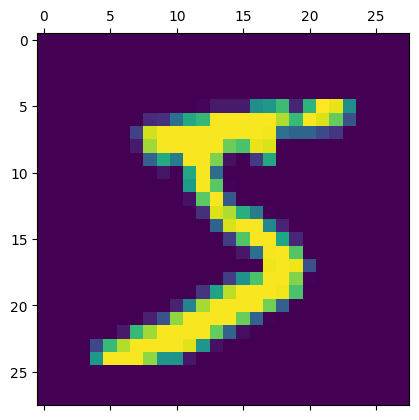

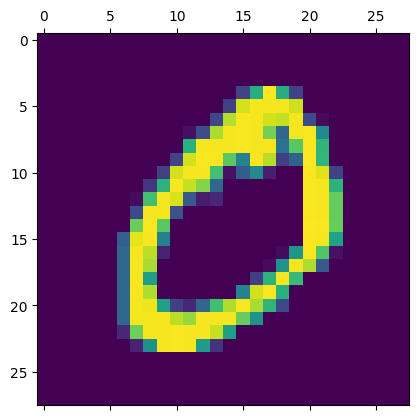

In [19]:
plt.matshow(X_train[0])
plt.matshow(X_train[1])

In [22]:
print('y_train[0] : ',y_train[0])
print('y_train[1] : ',y_train[1])


y_train[0] :  5
y_train[1] :  0
